## Data visualization Ejercicio 3: Grafos en Python

### Profesor: Miguel Sempere Navarro
### Alumno: Marcelo Contreras Muñoz

In [1]:
# Networkx para grafos
import networkx as nx
import pandas as pd
# Mostrar imágenes
from IPython.display import HTML
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# importamos los datos y los convertimos en un data frame
df = pd.read_csv('metro_santiago.csv',sep=';')
df.head()

,Origen,Destino,Distancia
0,San Pablo,Neptuno,690
1,Neptuno,Pajaritos,1030
2,Pajaritos,Las Rejas,860
3,Las Rejas,Ecuador,520
4,Ecuador,San Alberto Hurtado,680


In [3]:
df.describe()

,Distancia
count,136.000000
mean,1040.588235
std,384.843912
min,400.000000
25%,760.000000
50%,930.000000
75%,1310.000000
max,2250.000000


### Grafo que muestra la red de metro de la ciudad de Santiago de Chile
Para la construccion se tomo la data desde: https://es.wikipedia.org/wiki/Anexo:Estaciones_del_Metro_de_Santiago

In [4]:
#grafo dirigido
DG=nx.DiGraph()
for row in df.iterrows():#iteramos sobre las filas
    DG.add_edge(row[1]["Origen"],#para cada fila obtenemos el origen
                row[1]["Destino"],#luego el destino
                Distancia=row[1]["Distancia"])#consultamos la distancia


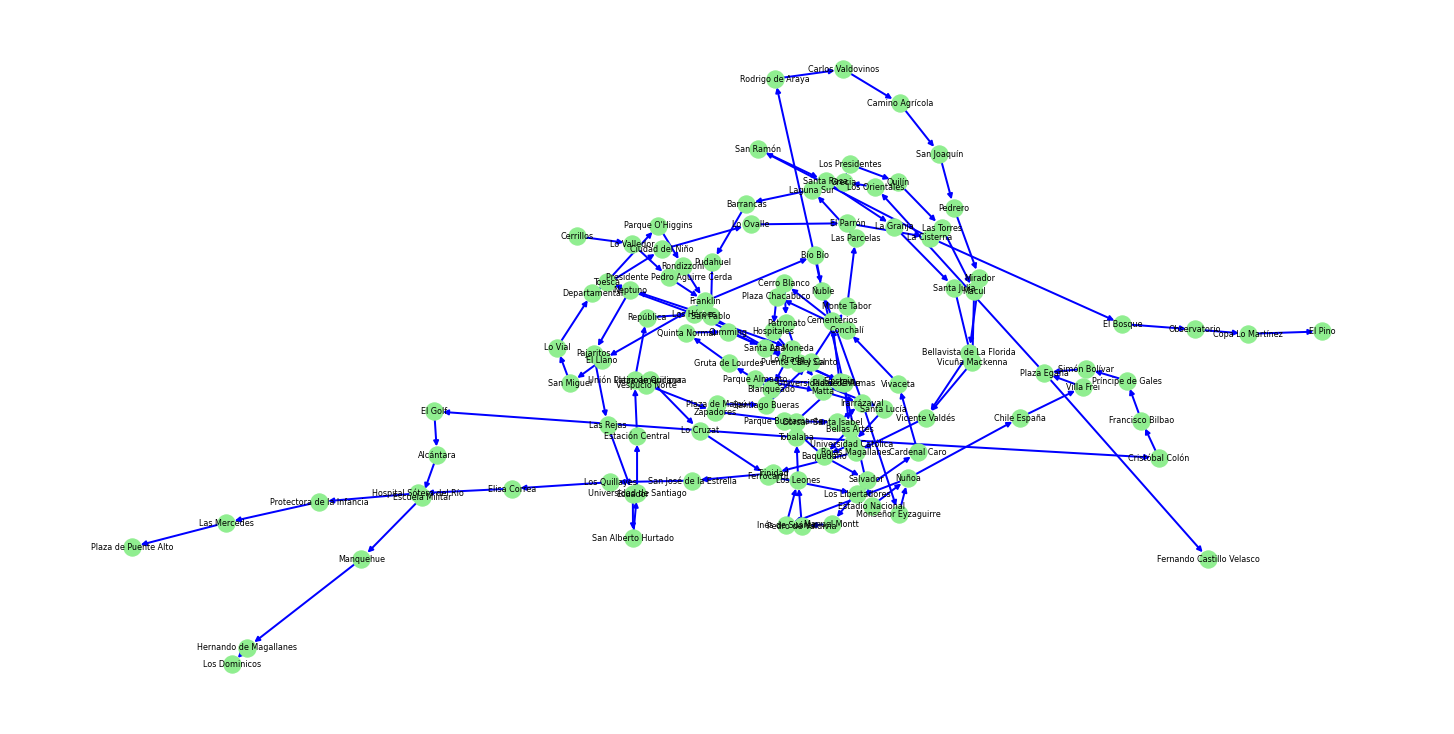

In [5]:
nx.draw(DG,
        node_color="lightgreen",
        edge_color='blue',
        font_size=8,
        width=2,
        with_labels=True, 
        node_size=300,
)

### Destancando Estaciones con Combinacion 

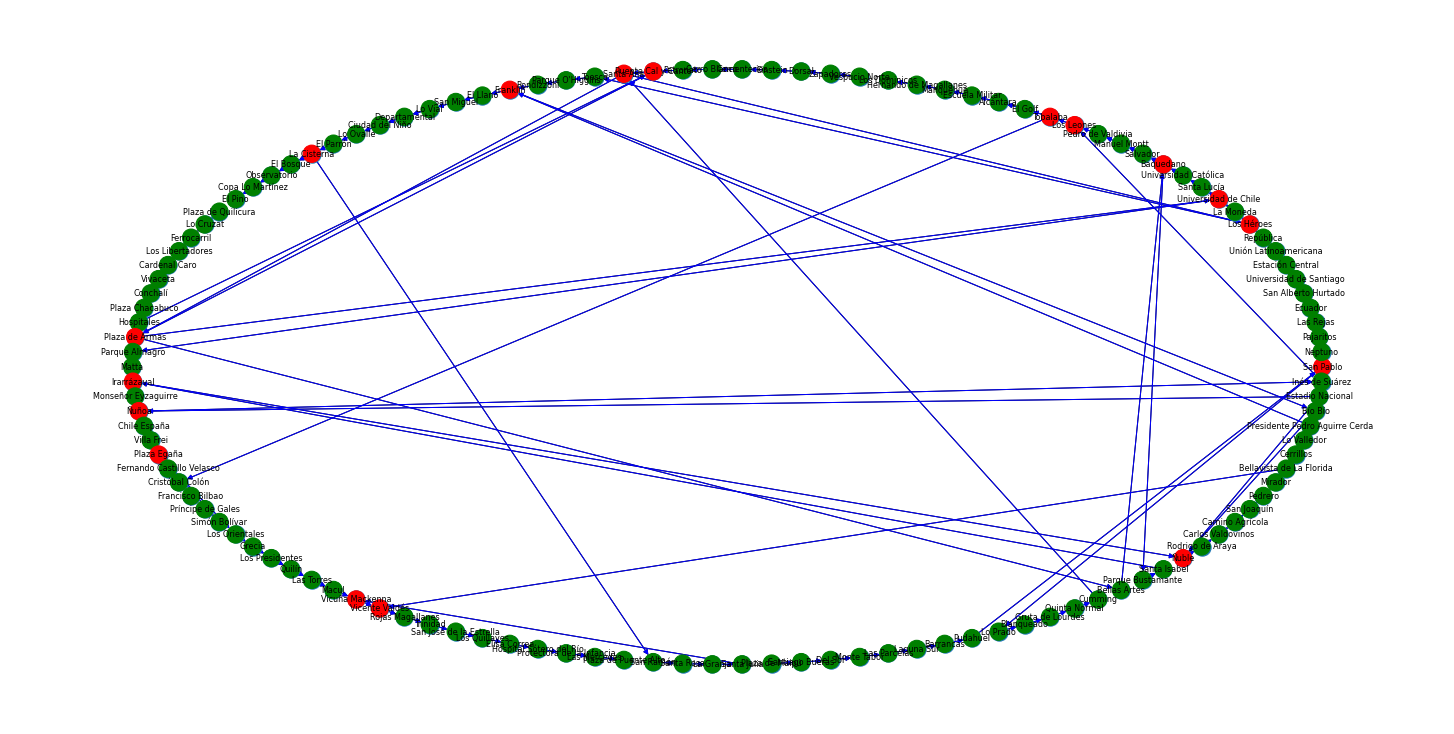

In [6]:
color_map = []
estaciones=['Tobalaba','Plaza de Armas','Universidad de Chile','Baquedano','Irarrázaval','Plaza Egaña','Vicuña Mackenna'\
           ,'Vicente Valdés','La Cisterna','Ñuble','Ñuñoa','Los Leones','Franklin','San Pablo','Santa Ana','Plaza de Armas'\
           ,'Puente Cal y Canto','Los Héroes']
for node in DG:
    if node in estaciones:
        color_map.append('red')
    else: 
        color_map.append('green')    

positions = nx.circular_layout(DG)

nx.draw(DG,
        pos=positions,
        edge_labels={('Ñuñoa','Estadio Nacional'):'Conexión'},
        font_color='black')

nx.draw(DG,
        pos=positions,
        node_color=color_map,
        edge_color='blue',
        with_labels=True,
        font_size=8,
        node_size=300)                
               
plt.show()

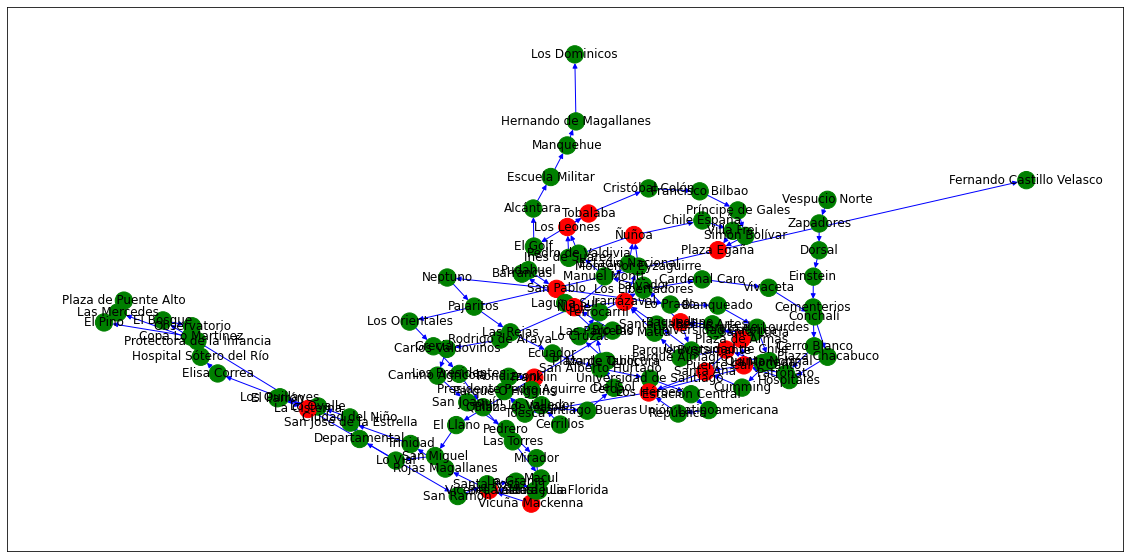

In [7]:
color_map = []
estaciones=['Tobalaba','Plaza de Armas','Universidad de Chile','Baquedano','Irarrázaval','Plaza Egaña','Vicuña Mackenna'\
           ,'Vicente Valdés','La Cisterna','Ñuble','Ñuñoa','Los Leones','Franklin','San Pablo','Santa Ana','Plaza de Armas'\
           ,'Puente Cal y Canto','Los Héroes']
for node in DG:
    if node in estaciones:
        color_map.append('red')
    else: 
        color_map.append('green')    
    
DG2= nx.draw_networkx(DG, 
             node_color=color_map,
             edge_color='blue',
             with_labels=True)

plt.show()

In [8]:
df.iloc[0]

Origen       San Pablo
Destino        Neptuno
Distancia          690
Name: 0, dtype: object

### Partes del grafo metro

In [9]:
DG.nodes()

NodeView(('San Pablo', 'Neptuno', 'Pajaritos', 'Las Rejas', 'Ecuador', 'San Alberto Hurtado', 'Universidad de Santiago', 'Estación Central', 'Unión Latinoamericana', 'República', 'Los Héroes', 'La Moneda', 'Universidad de Chile', 'Santa Lucía', 'Universidad Católica', 'Baquedano', 'Salvador', 'Manuel Montt', 'Pedro de Valdivia', 'Los Leones', 'Tobalaba', 'El Golf', 'Alcántara', 'Escuela Militar', 'Manquehue', 'Hernando de Magallanes', 'Los Dominicos', 'Vespucio Norte', 'Zapadores', 'Dorsal', 'Einstein', 'Cementerios', 'Cerro Blanco', 'Patronato', 'Puente Cal y Canto', 'Santa Ana', 'Toesca', "Parque O'Higgins", 'Rondizzoni', 'Franklin', 'El Llano', 'San Miguel', 'Lo Vial', 'Departamental', 'Ciudad del Niño', 'Lo Ovalle', 'El Parrón', 'La Cisterna', 'El Bosque', 'Observatorio', 'Copa Lo Martínez', 'El Pino', 'Plaza de Quilicura', 'Lo Cruzat', 'Ferrocarril', 'Los Libertadores', 'Cardenal Caro', 'Vivaceta', 'Conchalí', 'Plaza Chacabuco', 'Hospitales', 'Plaza de Armas', 'Parque Almagro', 'M

In [10]:
# Lista de nodos con atributos
DG.nodes(data=True)

NodeDataView({'San Pablo': {}, 'Neptuno': {}, 'Pajaritos': {}, 'Las Rejas': {}, 'Ecuador': {}, 'San Alberto Hurtado': {}, 'Universidad de Santiago': {}, 'Estación Central': {}, 'Unión Latinoamericana': {}, 'República': {}, 'Los Héroes': {}, 'La Moneda': {}, 'Universidad de Chile': {}, 'Santa Lucía': {}, 'Universidad Católica': {}, 'Baquedano': {}, 'Salvador': {}, 'Manuel Montt': {}, 'Pedro de Valdivia': {}, 'Los Leones': {}, 'Tobalaba': {}, 'El Golf': {}, 'Alcántara': {}, 'Escuela Militar': {}, 'Manquehue': {}, 'Hernando de Magallanes': {}, 'Los Dominicos': {}, 'Vespucio Norte': {}, 'Zapadores': {}, 'Dorsal': {}, 'Einstein': {}, 'Cementerios': {}, 'Cerro Blanco': {}, 'Patronato': {}, 'Puente Cal y Canto': {}, 'Santa Ana': {}, 'Toesca': {}, "Parque O'Higgins": {}, 'Rondizzoni': {}, 'Franklin': {}, 'El Llano': {}, 'San Miguel': {}, 'Lo Vial': {}, 'Departamental': {}, 'Ciudad del Niño': {}, 'Lo Ovalle': {}, 'El Parrón': {}, 'La Cisterna': {}, 'El Bosque': {}, 'Observatorio': {}, 'Copa Lo 

In [11]:
# Lista de conexiones
DG.edges()

OutEdgeView([('San Pablo', 'Neptuno'), ('San Pablo', 'Lo Prado'), ('Neptuno', 'Pajaritos'), ('Pajaritos', 'Las Rejas'), ('Las Rejas', 'Ecuador'), ('Ecuador', 'San Alberto Hurtado'), ('San Alberto Hurtado', 'Universidad de Santiago'), ('Universidad de Santiago', 'Estación Central'), ('Estación Central', 'Unión Latinoamericana'), ('Unión Latinoamericana', 'República'), ('República', 'Los Héroes'), ('Los Héroes', 'La Moneda'), ('Los Héroes', 'Toesca'), ('La Moneda', 'Universidad de Chile'), ('Universidad de Chile', 'Santa Lucía'), ('Universidad de Chile', 'Parque Almagro'), ('Santa Lucía', 'Universidad Católica'), ('Universidad Católica', 'Baquedano'), ('Baquedano', 'Salvador'), ('Baquedano', 'Parque Bustamante'), ('Salvador', 'Manuel Montt'), ('Manuel Montt', 'Pedro de Valdivia'), ('Pedro de Valdivia', 'Los Leones'), ('Los Leones', 'Tobalaba'), ('Tobalaba', 'El Golf'), ('Tobalaba', 'Cristóbal Colón'), ('El Golf', 'Alcántara'), ('Alcántara', 'Escuela Militar'), ('Escuela Militar', 'Manque

In [12]:
# Lista de conexiones con atributos
DG.edges(data=True)

OutEdgeDataView([('San Pablo', 'Neptuno', {'Distancia': 690}), ('San Pablo', 'Lo Prado', {'Distancia': 570}), ('Neptuno', 'Pajaritos', {'Distancia': 1030}), ('Pajaritos', 'Las Rejas', {'Distancia': 860}), ('Las Rejas', 'Ecuador', {'Distancia': 520}), ('Ecuador', 'San Alberto Hurtado', {'Distancia': 680}), ('San Alberto Hurtado', 'Universidad de Santiago', {'Distancia': 540}), ('Universidad de Santiago', 'Estación Central', {'Distancia': 750}), ('Estación Central', 'Unión Latinoamericana', {'Distancia': 630}), ('Unión Latinoamericana', 'República', {'Distancia': 560}), ('República', 'Los Héroes', {'Distancia': 590}), ('Los Héroes', 'La Moneda', {'Distancia': 460}), ('Los Héroes', 'Toesca', {'Distancia': 820}), ('La Moneda', 'Universidad de Chile', {'Distancia': 400}), ('Universidad de Chile', 'Santa Lucía', {'Distancia': 480}), ('Universidad de Chile', 'Parque Almagro', {'Distancia': 840}), ('Santa Lucía', 'Universidad Católica', {'Distancia': 530}), ('Universidad Católica', 'Baquedano'

### Análisis de Centralidad

In [13]:
centralidad=nx.degree_centrality(DG)
sorted(centralidad.items(),key=lambda x:x[1])

[('Los Dominicos', 0.008),
 ('Vespucio Norte', 0.008),
 ('El Pino', 0.008),
 ('Plaza de Quilicura', 0.008),
 ('Fernando Castillo Velasco', 0.008),
 ('Plaza de Puente Alto', 0.008),
 ('Plaza de Maipú', 0.008),
 ('Cerrillos', 0.008),
 ('Neptuno', 0.016),
 ('Pajaritos', 0.016),
 ('Las Rejas', 0.016),
 ('Ecuador', 0.016),
 ('San Alberto Hurtado', 0.016),
 ('Universidad de Santiago', 0.016),
 ('Estación Central', 0.016),
 ('Unión Latinoamericana', 0.016),
 ('República', 0.016),
 ('La Moneda', 0.016),
 ('Santa Lucía', 0.016),
 ('Universidad Católica', 0.016),
 ('Salvador', 0.016),
 ('Manuel Montt', 0.016),
 ('Pedro de Valdivia', 0.016),
 ('El Golf', 0.016),
 ('Alcántara', 0.016),
 ('Escuela Militar', 0.016),
 ('Manquehue', 0.016),
 ('Hernando de Magallanes', 0.016),
 ('Zapadores', 0.016),
 ('Dorsal', 0.016),
 ('Einstein', 0.016),
 ('Cementerios', 0.016),
 ('Cerro Blanco', 0.016),
 ('Patronato', 0.016),
 ('Toesca', 0.016),
 ("Parque O'Higgins", 0.016),
 ('Rondizzoni', 0.016),
 ('El Llano', 0.

### Algoritmo Dijkstra's 

In [14]:
metro= nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Distancia')

In [15]:
djk_path= nx.dijkstra_path(metro, source='Tobalaba', target='Baquedano', weight='Distancia')
djk_path

['Tobalaba',
 'Los Leones',
 'Pedro de Valdivia',
 'Manuel Montt',
 'Salvador',
 'Baquedano']

In [16]:
list(nx.all_shortest_paths(DG, source="Baquedano", target="Tobalaba", weight=None))

[['Baquedano',
  'Salvador',
  'Manuel Montt',
  'Pedro de Valdivia',
  'Los Leones',
  'Tobalaba']]

In [17]:
list(nx.all_shortest_paths(DG, source="Pajaritos", target="Vicente Valdés", weight=None))

[['Pajaritos',
  'Las Rejas',
  'Ecuador',
  'San Alberto Hurtado',
  'Universidad de Santiago',
  'Estación Central',
  'Unión Latinoamericana',
  'República',
  'Los Héroes',
  'La Moneda',
  'Universidad de Chile',
  'Parque Almagro',
  'Matta',
  'Irarrázaval',
  'Ñuble',
  'Rodrigo de Araya',
  'Carlos Valdovinos',
  'Camino Agrícola',
  'San Joaquín',
  'Pedrero',
  'Mirador',
  'Bellavista de La Florida',
  'Vicente Valdés'],
 ['Pajaritos',
  'Las Rejas',
  'Ecuador',
  'San Alberto Hurtado',
  'Universidad de Santiago',
  'Estación Central',
  'Unión Latinoamericana',
  'República',
  'Los Héroes',
  'Toesca',
  "Parque O'Higgins",
  'Rondizzoni',
  'Franklin',
  'Bío Bío',
  'Ñuble',
  'Rodrigo de Araya',
  'Carlos Valdovinos',
  'Camino Agrícola',
  'San Joaquín',
  'Pedrero',
  'Mirador',
  'Bellavista de La Florida',
  'Vicente Valdés']]

### A* Path

In [18]:
list(nx.astar_path(DG, ("Pajaritos"), ("Vicente Valdés"), weight="Distancia"))

['Pajaritos',
 'Las Rejas',
 'Ecuador',
 'San Alberto Hurtado',
 'Universidad de Santiago',
 'Estación Central',
 'Unión Latinoamericana',
 'República',
 'Los Héroes',
 'La Moneda',
 'Universidad de Chile',
 'Santa Lucía',
 'Universidad Católica',
 'Baquedano',
 'Parque Bustamante',
 'Santa Isabel',
 'Irarrázaval',
 'Ñuble',
 'Rodrigo de Araya',
 'Carlos Valdovinos',
 'Camino Agrícola',
 'San Joaquín',
 'Pedrero',
 'Mirador',
 'Bellavista de La Florida',
 'Vicente Valdés']

In [19]:
def show_path(path):
    total_distancia= 0
    
    for i in range(len(path)-1):
        origen = path[i]
        destino = path[i+1]
        longitud = DG[origen][destino]["Distancia"]
    
        total_distancia = total_distancia+longitud
        km_recorridos=total_distancia/1000
        print(f'Origen : {origen} --> Destino : {destino}')
        print(f'Total Distancia entre estaciones: {total_distancia} metros ')        
    print(f'Total Distancia viaje: {total_distancia} metros ')
    print(f'Total Kms recorridos : {km_recorridos} km ')


In [20]:
show_path(['Pajaritos',
 'Las Rejas',
 'Ecuador',
 'San Alberto Hurtado',
 'Universidad de Santiago',
 'Estación Central',
 'Unión Latinoamericana'])

Origen : Pajaritos --> Destino : Las Rejas
Total Distancia entre estaciones: 860 metros 
Origen : Las Rejas --> Destino : Ecuador
Total Distancia entre estaciones: 1380 metros 
Origen : Ecuador --> Destino : San Alberto Hurtado
Total Distancia entre estaciones: 2060 metros 
Origen : San Alberto Hurtado --> Destino : Universidad de Santiago
Total Distancia entre estaciones: 2600 metros 
Origen : Universidad de Santiago --> Destino : Estación Central
Total Distancia entre estaciones: 3350 metros 
Origen : Estación Central --> Destino : Unión Latinoamericana
Total Distancia entre estaciones: 3980 metros 
Total Distancia viaje: 3980 metros 
Total Kms recorridos : 3.98 km 


In [21]:
'''función que muestra todos los caminos más cortos de un gráfico dirigido desde un origen a un destino'''
def get_all_shortest_paths(DiGraph, origin, destination):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destination
    ))
    
    '''en cuanto a peso dame los tramos por cada estación y los más cortos en distancia'''
    
    for weight in [None, "distancia",]:
        print("* Ordenando por: %s" % weight)
        '''dame todos los caminos posibles'''
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origin,
                                          target=destination,
                                          weight=weight))
        
        '''para cada una de las rutas generadas (path) '''
        
        for path in paths:
            print("   Camino óptimo: %s" % path)
            '''mostramos la funcion creada anteriormente que va a mostrar para cada camino las distancias'''
            show_path(path)

In [22]:
get_all_shortest_paths(DG, origin="Las Rejas", destination="Vicente Valdés")

*** All shortest paths - Origen: Las Rejas Destino: Vicente Valdés
* Ordenando por: None
   Camino óptimo: ['Las Rejas', 'Ecuador', 'San Alberto Hurtado', 'Universidad de Santiago', 'Estación Central', 'Unión Latinoamericana', 'República', 'Los Héroes', 'La Moneda', 'Universidad de Chile', 'Parque Almagro', 'Matta', 'Irarrázaval', 'Ñuble', 'Rodrigo de Araya', 'Carlos Valdovinos', 'Camino Agrícola', 'San Joaquín', 'Pedrero', 'Mirador', 'Bellavista de La Florida', 'Vicente Valdés']
Origen : Las Rejas --> Destino : Ecuador
Total Distancia entre estaciones: 520 metros 
Origen : Ecuador --> Destino : San Alberto Hurtado
Total Distancia entre estaciones: 1200 metros 
Origen : San Alberto Hurtado --> Destino : Universidad de Santiago
Total Distancia entre estaciones: 1740 metros 
Origen : Universidad de Santiago --> Destino : Estación Central
Total Distancia entre estaciones: 2490 metros 
Origen : Estación Central --> Destino : Unión Latinoamericana
Total Distancia entre estaciones: 3120 metr

In [23]:
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=8,
                width=1, 
                with_labels=True, 
                node_size=300, 
                alpha=0.8
           )
    
    short_path=nx.DiGraph()
    
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=8,
                width=3, 
                with_labels=True, 
                node_size=300
           )
    plt.show()

In [24]:
'''camino más corto con algoritmo A* (A star)'''

def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "duration"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origin),
                                  (destination),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)

*** Origen: Pajaritos Destino: Vicente Valdés
 Ordenado por: None
   Camino óptimo: ['Pajaritos', 'Las Rejas', 'Ecuador', 'San Alberto Hurtado', 'Universidad de Santiago', 'Estación Central', 'Unión Latinoamericana', 'República', 'Los Héroes', 'La Moneda', 'Universidad de Chile', 'Parque Almagro', 'Matta', 'Irarrázaval', 'Ñuble', 'Rodrigo de Araya', 'Carlos Valdovinos', 'Camino Agrícola', 'San Joaquín', 'Pedrero', 'Mirador', 'Bellavista de La Florida', 'Vicente Valdés'] 
Origen : Pajaritos --> Destino : Las Rejas
Total Distancia entre estaciones: 860 metros 
Origen : Las Rejas --> Destino : Ecuador
Total Distancia entre estaciones: 1380 metros 
Origen : Ecuador --> Destino : San Alberto Hurtado
Total Distancia entre estaciones: 2060 metros 
Origen : San Alberto Hurtado --> Destino : Universidad de Santiago
Total Distancia entre estaciones: 2600 metros 
Origen : Universidad de Santiago --> Destino : Estación Central
Total Distancia entre estaciones: 3350 metros 
Origen : Estación Centra

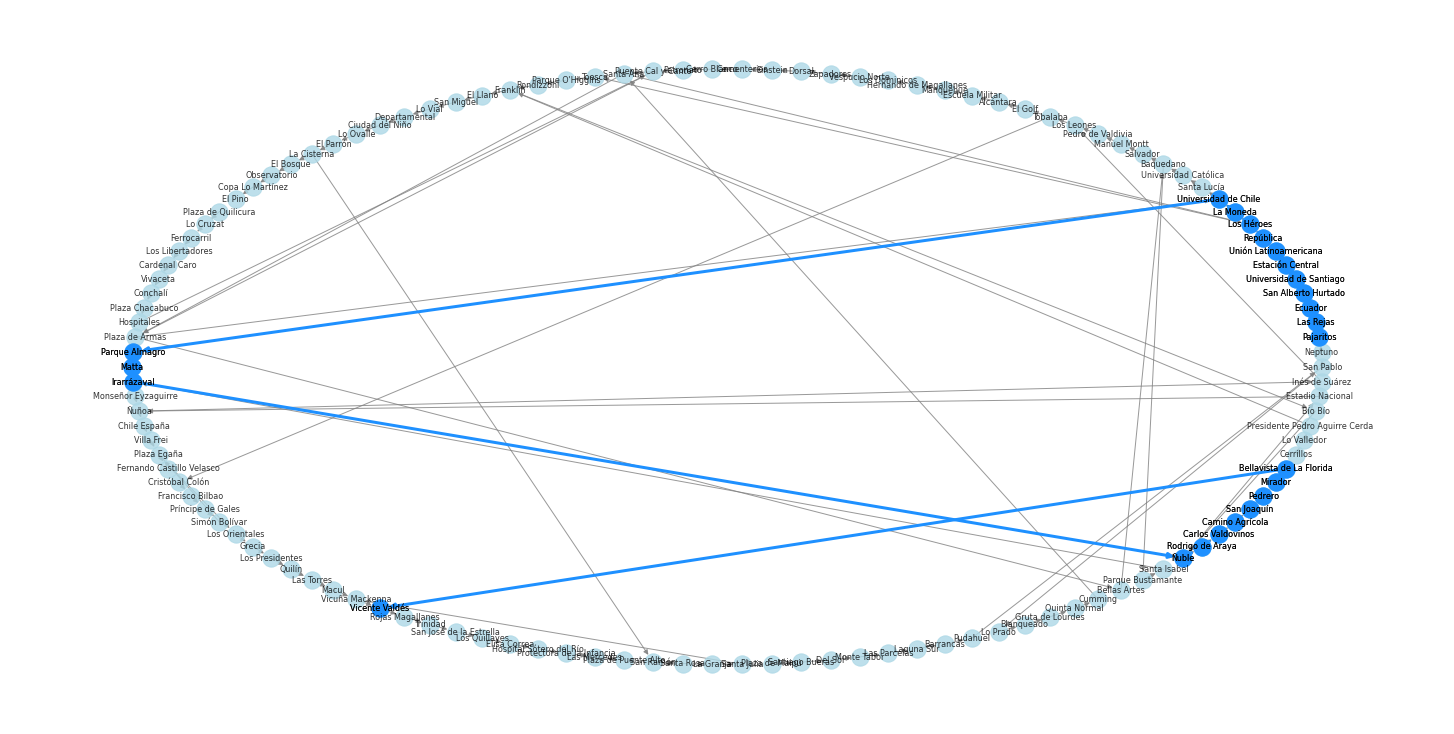

 Ordenado por: duration
   Camino óptimo: ['Pajaritos', 'Las Rejas', 'Ecuador', 'San Alberto Hurtado', 'Universidad de Santiago', 'Estación Central', 'Unión Latinoamericana', 'República', 'Los Héroes', 'La Moneda', 'Universidad de Chile', 'Parque Almagro', 'Matta', 'Irarrázaval', 'Ñuble', 'Rodrigo de Araya', 'Carlos Valdovinos', 'Camino Agrícola', 'San Joaquín', 'Pedrero', 'Mirador', 'Bellavista de La Florida', 'Vicente Valdés'] 
Origen : Pajaritos --> Destino : Las Rejas
Total Distancia entre estaciones: 860 metros 
Origen : Las Rejas --> Destino : Ecuador
Total Distancia entre estaciones: 1380 metros 
Origen : Ecuador --> Destino : San Alberto Hurtado
Total Distancia entre estaciones: 2060 metros 
Origen : San Alberto Hurtado --> Destino : Universidad de Santiago
Total Distancia entre estaciones: 2600 metros 
Origen : Universidad de Santiago --> Destino : Estación Central
Total Distancia entre estaciones: 3350 metros 
Origen : Estación Central --> Destino : Unión Latinoamericana
Tota

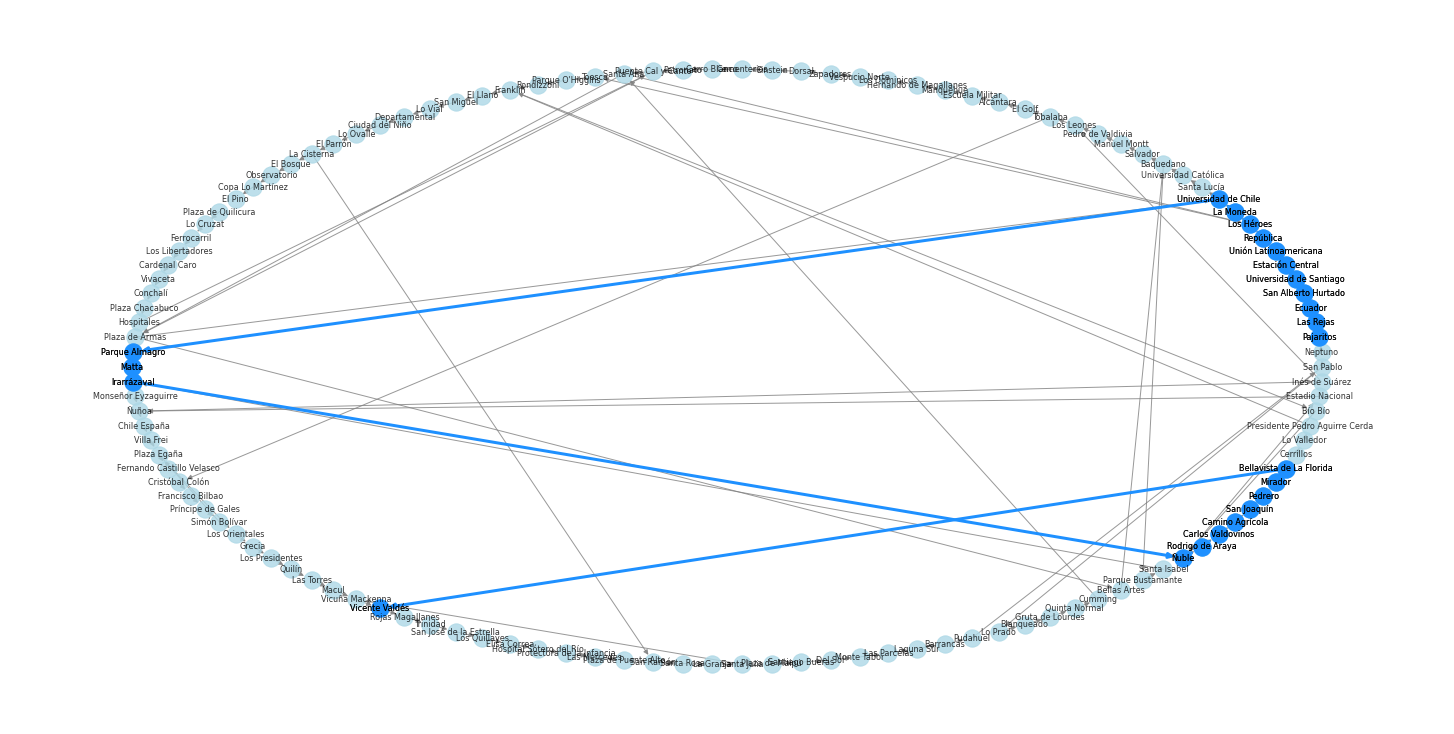

In [25]:
get_shortest_path(DG, origin="Pajaritos", destination="Vicente Valdés")